<font size="6">PyCoinGecko for CoinGecko API</font>

Cryptocurrency data is excellent to be used in an API because it is constantly updated and it is vital to cryptocurrency trading. We will use the **PyCoinGecko Python client/wrapper** for the **CoinGecko API**, updated every minute by CoinGecko. We use the wrapper/client because it is easy to use so you can focus on the task of collecting data.

Using **PyCoinGecko** to collect data is simple. All we need is to install and import the library, then create a client object, and finally use a function to request our data.

First, we need to install the **PyCoinGecko** library. Uncomment the following code block if the **PyCoinGecko** library has not been installed in the machine.

In [1]:
# !pip install pycoingecko

Then we need to import the library and create a client object.

In [2]:
# Import the library
from pycoingecko import CoinGeckoAPI

In [3]:
# Create the client object
cg = CoinGeckoAPI()

Finally, we use a function to request our data. In this function we are getting data on **bitcoin**, in **US dollars**, for the past **30** days. 

In [4]:
# Use the function to request the data
bitcoin_data = cg.get_coin_market_chart_by_id(id = 'bitcoin', vs_currency = 'usd', days = 30)

In this case our response is a **JSON** expressed as a **Python dictionary** of nested lists including _price_, _market cap_, and _total volumes_, which contain the _UNIX timestamp_ and the price at that time.

For easy viewing, we convert the Python dictionary into a Pandas dataframe.

In [5]:
# Import pandas library
import pandas as pd

In [6]:
df_bitcoin_data = pd.DataFrame(bitcoin_data)

In [7]:
df_bitcoin_data.head()

,prices,market_caps,total_volumes
0,"[1713103323603, 64401.45951151034]","[1713103323603, 1269212999291.562]","[1713103323603, 55261028938.18758]"
1,"[1713107088558, 63930.55908964325]","[1713107088558, 1258315211129.235]","[1713107088558, 64169597339.13461]"
2,"[1713110732879, 64277.94752775814]","[1713110732879, 1263356789174.9841]","[1713110732879, 65420854027.21368]"
3,"[1713114372758, 64430.15700218899]","[1713114372758, 1268062847074.4421]","[1713114372758, 58084368832.26261]"
4,"[1713118013475, 63814.38392012541]","[1713118013475, 1257755945557.0251]","[1713118013475, 56197205777.09624]"


We are only interested in price so that is what we will select using the key `price`. To make things simple, we can convert our nested list to a `DataFrame`, with the columns `timestamp` and `price`.

The following codes select the `prices` column from the Python dictionary and make the column heading `TimeStamp` and `Price`.

In [8]:
# Extracting the prices column from the Python dictionary
data = pd.DataFrame(bitcoin_data['prices'], columns=['TimeStamp', 'Price'])
data.head()

,TimeStamp,Price
0,1713103323603,64401.459512
1,1713107088558,63930.559090
2,1713110732879,64277.947528
3,1713114372758,64430.157002
4,1713118013475,63814.383920


It's difficult to understand the column `timestamp`. We will convert it to a more readable format using the pandas function `to_datetime()`. Using the `to_datetime()` function, we create readable time data, the input is the `timestamp` column, unit of time is set to milliseconds. We append the output to the new column, `date`. 

In [9]:
# Convert the timestamp to a readable format
data['Date'] = pd.to_datetime(data['TimeStamp'], unit = 'ms')
data.head()

,TimeStamp,Price,Date
0,1713103323603,64401.459512,2024-04-14 14:02:03.603
1,1713107088558,63930.559090,2024-04-14 15:04:48.558
2,1713110732879,64277.947528,2024-04-14 16:05:32.879
3,1713114372758,64430.157002,2024-04-14 17:06:12.758
4,1713118013475,63814.383920,2024-04-14 18:06:53.475


Now we want to create a candlestick plot. To get the data for the daily candlesticks we will group by the date to find the minimum, maximum, first, and last price of each day.

In [10]:
# Get the candlestick plot data
candlestick_data = data.groupby(data.Date.dt.date).agg({'Price': ['min', 'max', 'first', 'last']})
candlestick_data.head()

Price                                          
                     min           max         first          last
Date                                                              
2024-04-14  63687.023775  65379.668635  64401.459512  65379.668635
2024-04-15  63190.368481  66650.479411  65680.451764  63415.485289
2024-04-16  61922.025495  63937.600851  63409.243114  63812.814757
2024-04-17  60181.669230  64238.956490  63813.800580  61657.579437
2024-04-18  61048.751769  63702.626304  61271.934846  63524.558683

Finally we will use `plotly` to create the candlestick chart and plot it.

We need to install the `plotly` library before we can use it. Uncomment the following code block if `plotly` has not been installed in the machine. You can obtain more information from [Getting Started with Plotly in Python](https://plotly.com/python/getting-started/).

In [11]:
# !pip install plotly

In [22]:
# Import the library to create the plot
import plotly.graph_objects as go

In [23]:
# Import the library to create a html file of the plot
import plotly.offline

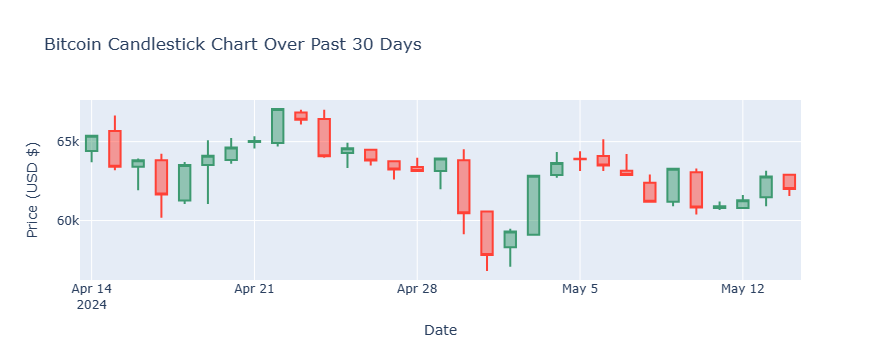

In [26]:
plotlyfig = go.Figure(data=[go.Candlestick(x = candlestick_data.index,
                                           open = candlestick_data['Price']['first'],
                                           high = candlestick_data['Price']['max'],
                                           low = candlestick_data['Price']['min'],
                                           close = candlestick_data['Price']['last']
                                           )
                            ]
                     )

plotlyfig.update_layout(xaxis_rangeslider_visible = False, xaxis_title = 'Date',
                        yaxis_title = 'Price (USD $)', title = 'Bitcoin Candlestick Chart Over Past 30 Days')

# plotly.offline.plot(plotlyfig, filename = './bitcoin_candlestick_graph.html', auto_open=False)

To create a HTML file of the chart, uncomment the last code in the last code block. We can view the candlestick chart by opening the HTML file and clicking Trust HTML in the top left of the tab.

You can find more information in using the `Plotly` library from the following website:
* [Getting Started with Plotly in Python](https://plotly.com/python/getting-started/)
* [Plotly Open Source Graphing Library for Python](https://plotly.com/python/)
* [Displaying Figures in Python](https://plotly.com/python/renderers/)
* [Troubleshooting Plotly Chart Not Showing in Jupyter Notebook and Jupyter Lab](https://saturncloud.io/blog/troubleshooting-plotly-chart-not-showing-in-jupyter-notebook/)